<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp7015/blob/main/comp7015_Lab1_Solving%C2%A0problems_using_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Solving problems using Search

---

In [ ]:
from IPython import display

# Queue

**Producer**

**Consumer**

## First in first out (FIFO) queue

FIFO queue is a simple queue concept, just like you lineup in front of the casher. The one goes lineup in the queue first would goes out first.

In [ ]:
display.IFrame(src='https://cslinux0.comp.hkbu.edu.hk/~kennycheng/fifo.html', width=400, height=200)

### FIFO queue in Python



In [ ]:
from queue import Queue

fifo = Queue()
fifo.put('Peter')
fifo.put('John')
fifo.put('Mary')
fifo.put('Amy')

# we would check how many items in the queue with `.qsize()`.
print(f'We have {fifo.qsize()} persons in queue.')

We have 4 persons in queue.


`.empty()` would return `false` if there are items in the queue, otherwise.

In [ ]:
while not fifo.empty():
  print(f'{fifo.get()} gone')

Peter gone
John gone
Mary gone
Amy gone


## Last in first out (LIFO) queue

Basically LIFO is similar to a **stack**. The last item put on stack will be taken out first.

In [ ]:
display.IFrame(src='https://cslinux0.comp.hkbu.edu.hk/~kennycheng/lifo.html', width=400, height=300)

### LIFO queue in Python

In [ ]:
from queue import LifoQueue

lifo = LifoQueue()
lifo.put('Peter')
lifo.put('John')
lifo.put('Mary')
lifo.put('Amy')

print(f'We have {lifo.qsize()} persons in queue.')

We have 4 persons in queue.


In [ ]:
while not lifo.empty():
  print(f'{lifo.get()} gone')

Amy gone
Mary gone
John gone
Peter gone


# Tree data structure

We could construct a tree easily using `treelib` module. It support visualizing the tree in text format natively. However, it would need `graphviz` module for output the tree in image format.

In [ ]:
!pip install treelib graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18385 sha256=16e1f839fe0b31e33d46b6b58bba0e055ad05c6deadabd809e634bef15388b82
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


## Tree Basics

Tree structure is an abstract hierarchical structure to represent hierarchical data. It consists of a **root node** with one or more child nodes. **Node** is the basic unit in a tree. For node in the depthest level, we call it **leaf node**.

To construct a tree with `treelib`, we first import `Tree` and `Node` class from `treelib`.

`Tree()` is for creating a treee and `.create_node(...)` is for creating a node.

### Tree and Node

Let's take a look to this 5 nodes tree as an example.

Root Node
├── Leaf Node 2
├── Leaf Node 3
└── Node 1
    └── Leaf Node 4



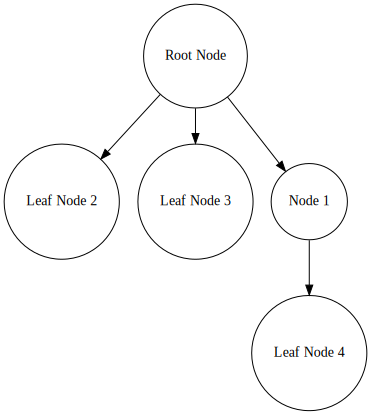

In [ ]:
from treelib import Node, Tree
tree = Tree()
tree.create_node("Root Node", 0) # 0 is the ID of node
tree.create_node("Node 1", 1, parent=0) # parent argument specify parent node of this node
tree.create_node("Leaf Node 2", 2, parent=0)
tree.create_node("Leaf Node 3", 3, parent=0)
tree.create_node("Leaf Node 4", 4, parent=1)
tree.show() # print the tree in ascii format

# output the tree in dot foramt for graphviz to render it as image
tree.to_graphviz('tree.dot')

from graphviz import Source
Source.from_file('tree.dot')

### Root node

`.root` would return the ID of root node

In [ ]:
tree.root

0

In [ ]:
tree.get_node(0).is_root()

True

### Leaf node

`.leaves()` lists leaf nodes in the tree.

In [ ]:
tree.leaves()

[Node(tag=Leaf Node 2, identifier=2, data=None),
 Node(tag=Leaf Node 3, identifier=3, data=None),
 Node(tag=Leaf Node 4, identifier=4, data=None)]

`is_leaf()` of a **node** checks whether it is a leaf node in the tree.

In [ ]:
tree.get_node(4).is_leaf()

True

In [ ]:
tree.get_node(1).is_leaf()

False

### Size of a tree

Size of a tree tells how many nodes in the tree.

In [ ]:
tree.size()

5

### Depth of a tree

Depth of a tree tells how many levels in the tree. (without root level)


In [ ]:
tree.depth()

2

We could use `.subtree(id)` to obtain a sub tree.

In [ ]:
tree.subtree(1).show()

Node 1
└── Leaf Node 4



### Level of a node

In [ ]:
tree.level(4)

2

## Traveling

### children

In [ ]:
tree.children(tree.root)

[Node(tag=Node 1, identifier=1, data=None),
 Node(tag=Leaf Node 2, identifier=2, data=None),
 Node(tag=Leaf Node 3, identifier=3, data=None)]

### parent

In [ ]:
tree.parent(4)

Node(tag=Node 1, identifier=1, data=None)

### siblings

In [ ]:
tree.siblings(1)

[Node(tag=Leaf Node 2, identifier=2, data=None),
 Node(tag=Leaf Node 3, identifier=3, data=None)]

In [ ]:
tree.siblings(2)

[Node(tag=Node 1, identifier=1, data=None),
 Node(tag=Leaf Node 3, identifier=3, data=None)]

## Save data in Node

The following code save a dictionary with key-value pair `"isRoot":True` in root node.

In [ ]:
tree.get_node(0).data = {"isRoot":True}

# Breadth-First Search (BFS)

BFS search travels the tree by **going flat first**.

Here is an example tree indicating the traveling sequence.

In [ ]:
from treelib import Node, Tree
tree = Tree()
tree.create_node("0", 0)
tree.create_node("1", 1, parent=0)
tree.create_node("2", 2, parent=0)
tree.create_node("3", 3, parent=0)
tree.create_node("4", 4, parent=1)
tree.create_node("5", 5, parent=1)
tree.create_node("6", 6, parent=3)
tree.create_node("7", 7, parent=3)
tree.create_node("8", 8, parent=4)
tree.create_node("9", 9, parent=4)
tree.create_node("10", 10, parent=6)
tree.create_node("11", 11, parent=6)
tree.show()
tree.to_graphviz('bfs.dot')

0
├── 1
│   ├── 4
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2
└── 3
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7



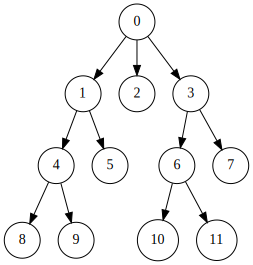

In [ ]:
from graphviz import Source
Source.from_file('bfs.dot')

## BFS implementation using FIFO

In [ ]:
q = Queue()
q.put(0) # put the root node ID in queue

while not q.empty():           # keep looping when the queue is not empty
  nodeId = q.get()             # get a nodeId from queue
  for n in tree.children(nodeId): # looping through its childs
    q.put(n.identifier)        # put each child into the queue
  tree.get_node(nodeId).tag += " (reached)" # mark node tag with (reached)
  tree.show()                     # print out current tree

0 (reached)
├── 1
│   ├── 4
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2
└── 3
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2
└── 3
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2 (reached)
└── 3
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2 (reached)
└── 3 (reached)
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4 (reached)
│   │   ├── 8
│   │   └── 9
│   └── 5
├── 2 (reached)
└── 3 (reached)
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4 (reached)
│   │   ├── 8
│   │   └── 9
│   └── 5 (reached)
├── 2 (reached)
└── 3 (reached)
    ├── 6
    │   ├── 10
    │   └── 11
    └── 7

0 (reached)
├── 1 (reached)
│   ├── 4 (reached)
│   │   ├── 8
│   │   └── 9


# Depth First Search (DFS)

DFS search travels the tree by **going deep first**.

Here is an example tree indicating the traveling sequence.

In [ ]:
from treelib import Node, Tree
tree = Tree()
tree.create_node("0", 0)
tree.create_node("1", 1, parent=0)
tree.create_node("2", 2, parent=1)
tree.create_node("3", 3, parent=2)
tree.create_node("4", 4, parent=2)
tree.create_node("5", 5, parent=1)
tree.create_node("6", 6, parent=0)
tree.create_node("7", 7, parent=0)
tree.create_node("8", 8, parent=7)
tree.create_node("9", 9, parent=8)
tree.create_node("10", 10, parent=8)
tree.create_node("11", 11, parent=7)
tree.show()
tree.to_graphviz('dfs.dot')

0
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7
    ├── 11
    └── 8
        ├── 10
        └── 9



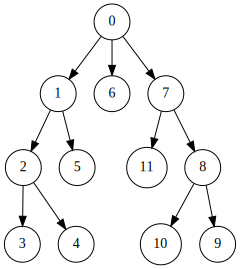

In [ ]:
from graphviz import Source
Source.from_file('dfs.dot')

## DFS implementation using LIFO

In [ ]:
q = LifoQueue()
q.put(0) # put the root node ID in queue

while not q.empty():           # keep looping when the queue is not empty
  nodeId = q.get()             # get a nodeId from queue
  for n in tree.children(nodeId): # looping through its childs
    q.put(n.identifier)        # put each child into the queue
  tree.get_node(nodeId).tag += " (reached)" # mark node tag with (reached)
  tree.show()                     # print out current tree

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7
    ├── 11
    └── 8
        ├── 10
        └── 9

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7 (reached)
    ├── 11
    └── 8
        ├── 10
        └── 9

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7 (reached)
    ├── 11 (reached)
    └── 8
        ├── 10
        └── 9

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7 (reached)
    ├── 11 (reached)
    └── 8 (reached)
        ├── 10
        └── 9

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7 (reached)
    ├── 11 (reached)
    └── 8 (reached)
        ├── 10 (reached)
        └── 9

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6
└── 7 (reached)
    ├── 11 (reached)
    └── 8 (reached)
        ├── 10 (reached)
        └── 9 (reached)

0 (reached)
├── 1
│   ├── 2
│   │   ├── 3
│   │   └── 4
│   └── 5
├── 6 (rea

# Case study 1: 8-puzzle

Given a `3 x 3` board with 8 tiles numbered from 1 to 8 arrange in random order.

|   |   |   |
|---|---|---|
| 7 | 5 | 2 |
| 4 |   | 6 |
| 8 | 3 | 1 |

You will need to rearrange the number in sequence like the following. In each move, you are allowed to swap position with surrounding number.

|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 |   |



## Program the game

### Initialize a game board

Let's define a function for initializing a new game board in 3x3.

In [ ]:
import numpy as np
import random

def newGameBoard():
  board = [str(i) for i in range(1,9)] # create a string list with number 1 to 8
  random.shuffle(board)
  board.insert(4, '') # insert an empty string at the middle of list
   # shuffle the list
  return np.reshape(board, (3,3)) # reshape the list to 3x3 2d-array

To use the function, simply invoke it without any argument. It would return a 2D-array with shape `(3, 3)`.

In [ ]:
gameBoard = np.array([['1', '2', '3'],
             ['4', '5', '6'],
['7','','8']])

In [ ]:
gameBoard = newGameBoard()
print(gameBoard)

[['3' '8' '5']
 ['2' '' '6']
 ['4' '7' '1']]


### Access the numbers

We could access an item with `numpy.ndarray` syntax `gameBoard[y, x]`. It would return the corresponding item in the coordinate. For the coordinate system in `gameBoard`, `[0, 0]` locates the top left item and `[2, 2]` locates the bottom right item.

In [ ]:
print(gameBoard[0, 0])
print(gameBoard[0, 1])
print(gameBoard[1, 0])
print(gameBoard[1, 1])

3
8
2



### Finding an item in the game board with value

Let's define another helper function for getting the coordinate of a particular value.


In [ ]:
def getCoord(board, value):
  return tuple(np.reshape(np.where(board == value), 2))

coord = getCoord(gameBoard, '')
print(coord)
print(gameBoard[coord])

y, x = coord
print(y, x)


(1, 1)

1 1


### List possible moves

Let's define a function to list possible moves for a particular item.



In [ ]:
def listMoves(board):
  y, x = getCoord(board, '')
  moves = [tuple([y, x] + np.array([-1,0])), # top
           tuple([y, x] + np.array([0,1])), # right
           tuple([y, x] + np.array([1,0])), # bottom
           tuple([y, x] + np.array([0,-1]))] # left
  return [(y, x) for y, x in moves if y >= 0 and y < gameBoard.shape[0] and x >= 0 and x < gameBoard.shape[1]]

In [ ]:
currentMoves = listMoves(gameBoard)
print(currentMoves)

[(0, 1), (1, 2), (2, 1), (1, 0)]


### Swap position

In [ ]:
def moveTo(board, target):
  coord = getCoord(board, '')
  board[target], board[coord] = board[coord], board[target]
  return board

In [ ]:
print(gameBoard)

moveTo(gameBoard, currentMoves[0])

print(gameBoard)

[['3' '8' '5']
 ['2' '' '6']
 ['4' '7' '1']]
[['3' '' '5']
 ['2' '8' '6']
 ['4' '7' '1']]


## Solve the game with BFS

### Initialization

In [ ]:
game = newGameBoard() # create a new game
tree = Tree() # create a tree

fifo = Queue() # create a FIFO queue
# put the root node in queue
fifo.put(tree.create_node(f"{game}", identifier=f"{game}", data=game))

# define the goal state in string format
goalId = f"{np.array([['1','2','3'],['4','5','6'],['7','8','']])}"

tree.show()

[['5' '4' '8']
 ['3' '' '2']
 ['6' '7' '1']]



### Define goal checking function

In [ ]:
def goalCheck():
  while tree.get_node(goalId) == None:
    yield

### Game loop

In [ ]:
from tqdm import tqdm

for _ in tqdm(goalCheck(), position=0, leave=True):
  if fifo.empty():
    break
  node = fifo.get()
  for move in listMoves(node.data):
    board = moveTo(np.copy(node.data), move) # make a copy of the tree for each node
    try: # skipping node already in tree, it would throw a duplicated node execption
      fifo.put(tree.create_node(f"{move}", identifier=f"{board}", parent=node.identifier, data=board))
    except:
      pass

181440it [00:57, 3132.89it/s]


### Result checking

In [ ]:
print(tree.size())
print(len(tree.leaves()))

181440
53771


In [ ]:
if tree.get_node(goalId) == None:
  print("No solution")
else:
  print("Solved")

  # print out steps reversed from goal to root
  for node in tree.rsearch(goalId): 
    print(node)

No solution


## Solve the game with DFS

### Initialization

We only need to re-initialize the tree and queue

In [ ]:
tree = Tree() # create a tree

lifo = LifoQueue() # create a FIFO queue
# put the root node in queue
lifo.put(tree.create_node(f"{game}", identifier=f"{game}", data=game))

tree.show()

[['5' '4' '8']
 ['3' '' '2']
 ['6' '7' '1']]



### Game loop

In [ ]:
for _ in tqdm(goalCheck(), position=0, leave=True):
  if lifo.empty():
    break
  node = lifo.get()
  for move in listMoves(node.data):
    board = moveTo(np.copy(node.data), move) # make a copy of the tree for each node
    try: # skipping node already in tree, it would throw a duplicated node execption
      lifo.put(tree.create_node(f"{move}", identifier=f"{board}", parent=node.identifier, data=board))
    except:
      pass

181440it [00:58, 3087.58it/s]


### Result checking

In [ ]:
print(tree.size())
print(len(tree.leaves()))

181440
63146


In [ ]:
if tree.get_node(goalId) == None:
  print("No solution")
else:
  print("Solved")

  # print out steps reversed from goal to root
  for node in tree.rsearch(goalId): 
    print(node)

No solution


# Case study 2: pathfinding

Let's take a look to another case study of applying BFS in path finding. This time we will use an path finding module intead of using our own implementation.

Let's install [pathfinding](https://github.com/brean/python-pathfinding.git) module and import it.

In [ ]:
!pip install pathfinding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## BFS path finder

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.breadth_first import BreadthFirstFinder

### Map initialization

Let's create a 2d-array as map with `Grid`. In this map, `0` indicates an obstacle and `1` is free space allow for travel.

In [ ]:
grid = Grid(matrix=[
  [1, 1, 1],
  [1, 0, 1],
  [1, 1, 1]
])

We are going to travel from the top left to the bottom right point. Let's get the points with `.node` of `grid`.

In [ ]:
start = grid.node(0, 0)
end = grid.node(2, 2)

### Specify finder algorithm

We then specify the finder by initializing an instance and then find the path by invoking `.find_path` function with starting point, ending point and the grid.

In [ ]:
finder = BreadthFirstFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

### Check the result

After running the algorithm, we could display the path in ascii format by passing in the path, starting point and ending point to `.grid_str` function.

- `s` indicates starting point
- `e` indicates ending point
- `x` indicates the path
- `#` indicates obstacle

In [ ]:
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 8 path length: 4
+---+
|sx |
| #x|
|  e|
+---+


### Detail implemenating of BFS finder

Let's take a look to the [BFS implementation](https://github.com/brean/python-pathfinding/blob/main/pathfinding/finder/breadth_first.py) in `pathfinding` library. The main logic of BFS is happened in the `check_neighbors` function.

```python
  def check_neighbors(self, start, end, grid, open_list):
        node = open_list.pop(0) # takes out first item in open_list as node
        node.closed = True

        if node == end:
            return backtrace(end)

        neighbors = self.find_neighbors(grid, node)
        for neighbor in neighbors: # loop the neighbors of node
            if neighbor.closed or neighbor.opened:
                continue

            open_list.append(neighbor) # append each neighbor to open_list
            neighbor.opened = True
            neighbor.parent = node
```

`open_list` is the queue implemented using a simple list. At the beginning of function, it takes out the first item in `open_list` with `.pop(0)`. Then find out its neighbors and add each neighbor into the `open_list` queue.

## Make a new DFS finder for `pathfinding` library

After read through the code of BFS finder in `pathfinding`, we would know how to implement a DFS finder by modifying the code. The main modification is changing the FIFO queue to LIFO queue.


Here is an example.

In [ ]:
from pathfinding.finder.finder import Finder, TIME_LIMIT, MAX_RUNS
from pathfinding.core.util import backtrace
from pathfinding.core.diagonal_movement import DiagonalMovement

class DepthFirstFinder(Finder):
    def __init__(self, heuristic=None, weight=1,
                 diagonal_movement=DiagonalMovement.never,
                 time_limit=TIME_LIMIT,
                 max_runs=MAX_RUNS):
        super(DepthFirstFinder, self).__init__(
            heuristic=heuristic,
            weight=weight,
            weighted=False,
            diagonal_movement=diagonal_movement,
            time_limit=time_limit,
            max_runs=max_runs)
        if not diagonal_movement:
            self.diagonalMovement = DiagonalMovement.never

    def check_neighbors(self, start, end, grid, open_list):
        node = open_list.pop(-1) # get the last item from list

        if node == end:
            return backtrace(end)

        neighbors = [neighbor for neighbor in self.find_neighbors(grid, node) if not neighbor.closed]
        if len(neighbors) > 0:
          open_list.append(node)
          open_list.append(neighbors[0])
          neighbors[0].opened = True
          neighbors[0].parent = node
        
        node.closed = True

### Reinitialize the map

In [ ]:
grid = Grid(matrix=[
  [1, 1, 1],
  [1, 0, 1],
  [1, 1, 1]
])

start = grid.node(0, 0)
end = grid.node(2, 2)

### Try out our DepthFirstFinder

In [ ]:
finder = DepthFirstFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

### Check the result

In [ ]:
print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 5 path length: 5
+---+
|sxx|
| #x|
|  e|
+---+
